In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
from numpy import cov
from scipy.stats import linregress
from scipy.stats import pearsonr

# New York

In [2]:
# Files to open
ny_overdose = pd.read_csv("csv_series/overdose_New York.csv")
ny_unemployment = pd.read_csv("csv_series/unemployment_states32.csv")
ny_earnings = pd.read_csv("csv_series/earnings_states32.csv")


In [3]:
ny_overdose.head()
ny_overdose = ny_overdose.sort_values(["Year"], ascending=False)
ny_overdose.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
13,New York,2015,13.6,NaN,10.8,NaN,0.20,NaN,0.26,NaN
1,New York,2014,11.3,NaN,8.6,NaN,0.00,NaN,0.04,NaN
9,New York,2013,11.3,NaN,8.3,NaN,0.09,NaN,0.09,NaN
10,New York,2012,10.4,NaN,7.6,NaN,0.07,NaN,0.12,NaN
16,New York,2011,9.7,NaN,6.8,NaN,0.24,NaN,0.26,NaN


In [4]:
ny_unemployment.head()

,state_id,year,unemployment_rate
0,32,2018,3.9
1,32,2017,4.6
2,32,2016,4.8
3,32,2015,4.9
4,32,2014,5.8


In [5]:
ny_earnings.head()

,state_id,year,earnings,pct_change
0,32,2018,8017398,1.5
1,32,2017,7899798,1.5
2,32,2016,7782407,1.7
3,32,2015,7648846,2.2
4,32,2014,7484182,2.2


In [6]:
combined_unemp_earn = pd.merge(ny_unemployment, ny_earnings, how="outer", on=['year'])
combined_unemp_earn.head()

,state_id_x,year,unemployment_rate,state_id_y,earnings,pct_change
0,32,2018,3.9,32.0,8017398.0,1.5
1,32,2017,4.6,32.0,7899798.0,1.5
2,32,2016,4.8,32.0,7782407.0,1.7
3,32,2015,4.9,32.0,7648846.0,2.2
4,32,2014,5.8,32.0,7484182.0,2.2


In [7]:
clean_unemp_earn = combined_unemp_earn[['state_id_x', 'year', 'unemployment_rate', 'earnings', 'pct_change']]
clean_unemp_earn = clean_unemp_earn.rename(columns={"state_id_x":"state", 'year': 'Year'})
clean_unemp_earn.head()

,state,Year,unemployment_rate,earnings,pct_change
0,32,2018,3.9,8017398.0,1.5
1,32,2017,4.6,7899798.0,1.5
2,32,2016,4.8,7782407.0,1.7
3,32,2015,4.9,7648846.0,2.2
4,32,2014,5.8,7484182.0,2.2


In [8]:
ny_combined = pd.merge(clean_unemp_earn, ny_overdose, how="outer", on=['Year'])
ny_combined_df = ny_combined[['Location','Year','unemployment_rate', 'earnings', 'pct_change', 
                                        'All Drug Overdose Death Rate (Age-Adjusted)', 
                                        'Opioid Overdose Death Rate (Age-Adjusted)',
                                        'Percent Change in All Drug Overdose Death Rate from Prior Year', 
                                        'Percent Change in Opioid Overdose Death Rate from Prior Year']]
ny_combined_df


,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,NaN,2018,3.9,8017398.0,1.5,NaN,NaN,NaN,NaN
1,NaN,2017,4.6,7899798.0,1.5,NaN,NaN,NaN,NaN
2,NaN,2016,4.8,7782407.0,1.7,NaN,NaN,NaN,NaN
3,New York,2015,4.9,7648846.0,2.2,13.6,10.8,0.20,0.26
4,New York,2014,5.8,7484182.0,2.2,11.3,8.6,0.00,0.04
5,New York,2013,7.1,7321113.0,1.8,11.3,8.3,0.09,0.09
6,New York,2012,8.2,7190226.0,2.0,10.4,7.6,0.07,0.12
7,New York,2011,8.6,7051385.0,2.1,9.7,6.8,0.24,0.26
8,New York,2010,8.4,6905804.0,0.1,7.8,5.4,-0.03,0.00
9,New York,2009,8.9,6901480.0,-3.7,8.0,5.4,-0.06,-0.04


In [9]:
ny_combined_sort = ny_combined_df.sort_values(['Year'], ascending=True)
ny_combined_sort.reset_index(drop=True, inplace=True)
ny_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,New York,1999,NaN,NaN,NaN,5.0,3.2,NaN,NaN
1,New York,2000,4.2,NaN,NaN,4.0,2.6,-0.20,-0.19
2,New York,2001,6.0,NaN,NaN,5.6,3.2,0.40,0.23
3,New York,2002,6.2,6848947.0,-2.4,4.8,2.9,-0.14,-0.09
4,New York,2003,6.4,6803570.0,-0.7,5.0,3.0,0.04,0.03


In [10]:
ny_combined_sort['earnings_index'] = (ny_combined_sort['earnings']/ny_combined_sort.loc[3,'earnings'])*100
ny_combined_sort.head()

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
0,New York,1999,NaN,NaN,NaN,5.0,3.2,NaN,NaN,NaN
1,New York,2000,4.2,NaN,NaN,4.0,2.6,-0.20,-0.19,NaN
2,New York,2001,6.0,NaN,NaN,5.6,3.2,0.40,0.23,NaN
3,New York,2002,6.2,6848947.0,-2.4,4.8,2.9,-0.14,-0.09,100.00000
4,New York,2003,6.4,6803570.0,-0.7,5.0,3.0,0.04,0.03,99.33746


In [11]:
ny_combined_final = ny_combined_sort.dropna()
ny_combined_final

,Location,Year,unemployment_rate,earnings,pct_change,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,earnings_index
3,New York,2002,6.2,6848947.0,-2.4,4.8,2.9,-0.14,-0.09,100.000000
4,New York,2003,6.4,6803570.0,-0.7,5.0,3.0,0.04,0.03,99.337460
5,New York,2004,5.2,6854296.0,0.7,4.3,2.4,-0.14,-0.20,100.078100
6,New York,2005,4.9,6928662.0,1.1,4.8,2.9,0.12,0.21,101.163902
7,New York,2006,4.2,7011126.0,1.2,8.6,5.2,0.79,0.79,102.367941
8,New York,2007,4.8,7122485.0,1.6,8.6,5.2,0.00,0.00,103.993869
9,New York,2008,6.7,7163286.0,0.6,8.5,5.6,-0.01,0.08,104.589596
10,New York,2009,8.9,6901480.0,-3.7,8.0,5.4,-0.06,-0.04,100.767023
11,New York,2010,8.4,6905804.0,0.1,7.8,5.4,-0.03,0.00,100.830157
12,New York,2011,8.6,7051385.0,2.1,9.7,6.8,0.24,0.26,102.955754


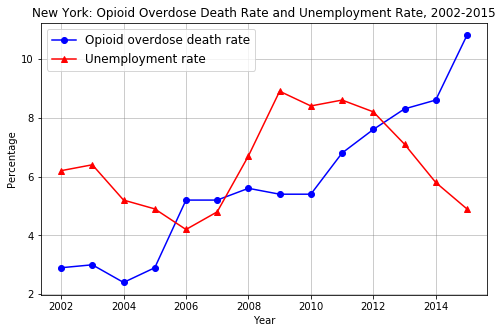

In [12]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = ny_combined_final['Year']

# Plot both of these lines so that they will appear on our final chart
overdose_handle, = plt.plot(x_axis, ny_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], marker ='o', 
                            color='blue', label='Opioid overdose death rate')
unemployment_handle, = plt.plot(x_axis, ny_combined_final['unemployment_rate'], marker='^', 
                                color='red', label="Unemployment rate")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("New York: Opioid Overdose Death Rate and Unemployment Rate, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Percentage")
 
plt.savefig("images/NY_overdose_unemployment.png")
plt.show()


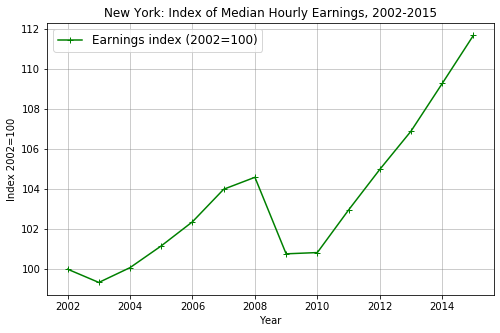

In [13]:
# Generate the plot
fig = plt.figure(figsize=(8,5))

# Create our x_axis list
x_axis = ny_combined_final['Year']

earnings_handle, = plt.plot(x_axis, ny_combined_final['earnings_index'], marker='+', 
                                 color='green', label="Earnings index (2002=100)")

plt.legend(loc='best',fontsize='large')
plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("New York: Index of Median Hourly Earnings, 2002-2015")
plt.xlabel("Year")
plt.ylabel("Index 2002=100")
 
plt.savefig("images/NY_earnings_index.png")
plt.show()

# Correlation between overdose and unemployment

In [14]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(ny_combined_final['unemployment_rate'],
                                                        ny_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * ny_combined_final['unemployment_rate'] + intercept

In [15]:
corr, _ = pearsonr(ny_combined_final['unemployment_rate'], ny_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.146


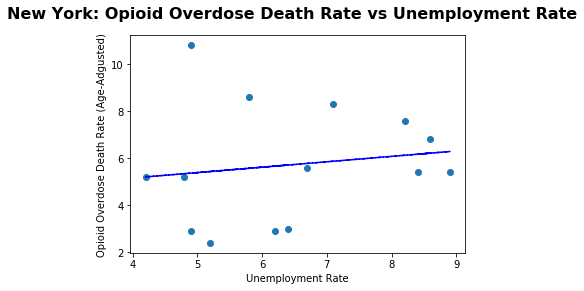

In [16]:
fig, ax = plt.subplots()

fig.suptitle("New York: Opioid Overdose Death Rate vs Unemployment Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(ny_combined_final['unemployment_rate'], 
        ny_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(ny_combined_final['unemployment_rate'], fit, 'b--')

plt.savefig("images/NY_corr_overdose_unemployment.png")
plt.show()

# Correlation between overdose and earnings

In [17]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(ny_combined_final['earnings_index'],
                                                        ny_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * ny_combined_final['earnings_index'] + intercept

In [19]:
rvalue

0.9196189196070992

In [18]:
corr, _ = pearsonr(ny_combined_final['earnings_index'], ny_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.920


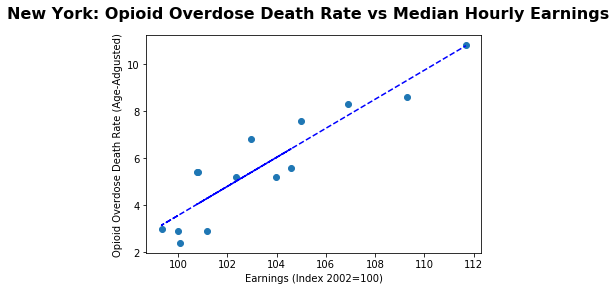

In [20]:
fig, ax = plt.subplots()

fig.suptitle("New York: Opioid Overdose Death Rate vs Median Hourly Earnings", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Earnings (Index 2002=100)")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(ny_combined_final['earnings_index'], 
        ny_combined_final['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(ny_combined_final['earnings_index'], fit, 'b--')

plt.savefig("images/NY_corr_overdose_earnings.png")
plt.show()